In [62]:
#Importing necessary Libraries
import pandas as pd
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#check GPU vs CPU
if torch.cuda.is_available():
  device = torch.device("cuda:0")
  print("GPU")
else:
  device = torch.device("cpu")
  print("CPU")

GPU


In [63]:
!nvidia-smi

Sun Aug 29 19:59:12 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.57.02    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P8    26W / 149W |      3MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [64]:
#Loading the dataset
data = pd.read_csv("FuelConsumptionCo2.csv")
data.head(10)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,2014,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


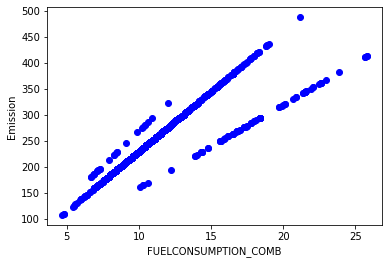

In [65]:
plt.scatter(data.FUELCONSUMPTION_COMB, data.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

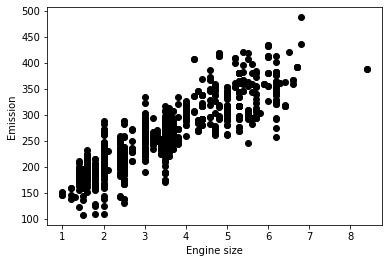

In [66]:
plt.scatter(data.ENGINESIZE, data.CO2EMISSIONS,  color='black')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [67]:
#Splitting the dataset into  training and testing dataset
train, test = train_test_split(data,  test_size = 0.2)

In [68]:
#Converting training data into tensors for Pytorch
X_train = torch.Tensor([[x] for x in list(train.ENGINESIZE)])
y_train = torch.torch.FloatTensor([[x] for x in list(train.CO2EMISSIONS)])
#Converting test data into tensors for Pytorch
X_test = torch.Tensor([[x] for x in list(test.ENGINESIZE)])
y_test = torch.FloatTensor([[x] for x in list(test.CO2EMISSIONS)])

In [69]:
#X_train.shape
#y_train.shape
X_test.shape

torch.Size([214, 1])

In [70]:
class LinearRegression(nn.Module):
    def __init__(self, in_size, out_size):
        super().__init__()
        self.lin = nn.Linear(in_features = in_size, out_features = out_size)
    def forward(self, X):
        pred = self.lin(X)
        return(pred)

In [71]:
model = LinearRegression(1 , 1)
#Unpacking the parameters
[w,b] = model.parameters()

In [72]:
#A method for getting the parameter values from the tensor object
def get_parameters():
    return(w[0][0].item(), b[0].item())

In [73]:
#A method for plotting the regressor
def plot_model(name):
    plt.title(name)
    plt.xlabel('ENGINESIZE')
    plt.ylabel('CO2EMISSIONS')
    w1, b1 = get_parameters()
    X1 = np.array([-15, 15])
    Y1 = w1 * X1 + b1
    plt.plot(X1, Y1, 'g')
    plt.scatter(X_train,y_train)
    plt.show()

In [74]:
# Setting the seed or random_state for reproducibility
torch.manual_seed(1)

In [75]:
#Printing the initial model parameters
print(list(model.parameters()))

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


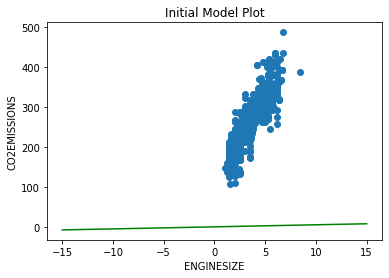

In [76]:
#Plotting the regression with initial parameters

#Plotting the regression with initial weight and bias
plot_model("Initial Model Plot")

In [77]:
#Initializing the loss function as Mean Squared Error
loss_fun = nn.MSELoss()
#Initializing the optimizer as Stochastic Gradient Descent with the model parameters and  learning rate 0.01
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [78]:
# Training the model
epochs = 100
losses = []
for i in range(epochs):
    y_pred = model.forward(X_train)
    loss = loss_fun(y_pred, y_train)
    print("@epoch : ", i, " #Loss : ", loss.item())
    losses.append(loss)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

@epoch :  0  #Loss :  69060.953125
@epoch :  1  #Loss :  36801.25390625
@epoch :  2  #Loss :  20222.2890625
@epoch :  3  #Loss :  11699.6484375
@epoch :  4  #Loss :  7316.12255859375
@epoch :  5  #Loss :  5059.1640625
@epoch :  6  #Loss :  3894.802978515625
@epoch :  7  #Loss :  3291.808837890625
@epoch :  8  #Loss :  2977.257080078125
@epoch :  9  #Loss :  2810.925537109375
@epoch :  10  #Loss :  2720.771728515625
@epoch :  11  #Loss :  2669.7822265625
@epoch :  12  #Loss :  2638.942626953125
@epoch :  13  #Loss :  2618.481201171875
@epoch :  14  #Loss :  2603.37890625
@epoch :  15  #Loss :  2591.056640625
@epoch :  16  #Loss :  2580.1884765625
@epoch :  17  #Loss :  2570.094482421875
@epoch :  18  #Loss :  2560.423583984375
@epoch :  19  #Loss :  2550.99609375
@epoch :  20  #Loss :  2541.7197265625
@epoch :  21  #Loss :  2532.546630859375
@epoch :  22  #Loss :  2523.452880859375
@epoch :  23  #Loss :  2514.42431640625
@epoch :  24  #Loss :  2505.4541015625
@epoch :  25  #Loss :  2496

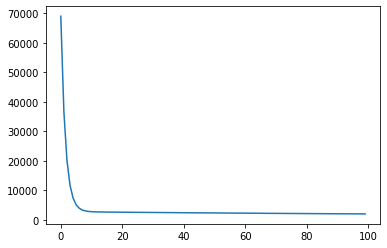

In [79]:
#Visualizing the loss curve
plt.plot(range(epochs), losses)

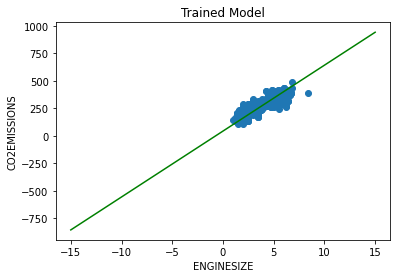

In [80]:
#Visualizing the trained regressor
plot_model("Trained Model")

In [81]:
#Predicting for X_test
y_pred_test = model.forward(X_test)

In [82]:
#Converting predictions from tensor objects into a list

y_pred_test = [y_pred_test[x].item() for x in range(len(y_pred_test))]

# Comparing Actual and predicted values
df = {}
df['Actual Observation'] = y_test
df['Predicted CO2'] = y_pred_test
df = pd.DataFrame(df)
print(df)

    Actual Observation  Predicted CO2
0      (tensor(216.),)     193.327774
1      (tensor(260.),)     259.279388
2      (tensor(308.),)     385.186981
3      (tensor(191.),)     139.367386
4      (tensor(294.),)     361.204590
..                 ...            ...
209    (tensor(258.),)     253.283783
210    (tensor(179.),)     139.367386
211    (tensor(274.),)     271.270599
212    (tensor(320.),)     307.244171
213    (tensor(356.),)     403.173798

[214 rows x 2 columns]


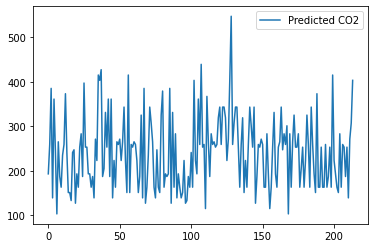

In [83]:
#Visualizing Actual and predicted values
df.plot()